### Exercise 3
#### Pattern Recognization and Machine Learning
#### Task 3

In [1]:
from sklearn.datasets import load_digits 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


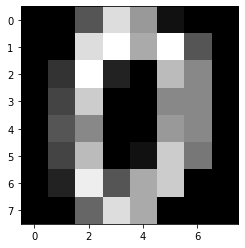

[0.9833333333333333, 0.9416666666666667, 0.5972222222222222, 0.9611111111111111]


In [2]:

digits = load_digits()
print(digits.keys())

plt.gray() 
plt.imshow(digits.images[0]) 
plt.show()

x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

KNN = KNeighborsClassifier()
LDA = LinearDiscriminantAnalysis()
SVC= SVC()
LR = LogisticRegression()

classifiers = [KNN,LDA,SVC,LR]
accuracy = []

for key in classifiers:
    key.fit(x_train,y_train)
    y_predic = key.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_predic))
print(accuracy)


### Task 4

#### Train classifiers for the GTSRB task.

In [3]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from simplelbp import local_binary_pattern

def load_data(folder):
    """ 
    Load all images from subdirectories of
    'folder'. The subdirectory name indicates
    the class.
    """
    
    X = []          # Images go here
    y = []          # Class labels go here
    classes = []    # All class names go here
    
    subdirectories = glob.glob(folder + "/*")
    
    # Loop over all folders
    for d in subdirectories:
        
        # Find all files from this folder
        files = glob.glob(d + os.sep + "*.jpg")
        
        # Load all files
        for name in files:
            
            # Load image and parse class name
            img = plt.imread(name)
            class_name = name.split(os.sep)[-2]

            # Convert class names to integer indices:
            if class_name not in classes:
                classes.append(class_name)
            
            class_idx = classes.index(class_name)
            
            X.append(img)
            y.append(class_idx)
    
    # Convert python lists to contiguous numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y

def extract_lbp_features(X, P = 8, R = 5):
    """
    Extract LBP features from all input samples.
    - R is radius parameter
    - P is the number of angles for LBP
    """
    
    F = [] # Features are stored here
    
    N = X.shape[0]
    for k in range(N):
        
        print("Processing image {}/{}".format(k+1, N))
        
        image = X[k, ...]
        lbp = local_binary_pattern(image, P, R)
        hist = np.histogram(lbp, bins=range(257))[0]
        F.append(hist)

    return np.array(F)

# Test our loader

X, y = load_data(".")
F = extract_lbp_features(X)
print("X shape: " + str(X.shape))
print("F shape: " + str(F.shape))


Processing image 1/202
Processing image 2/202
Processing image 3/202
Processing image 4/202
Processing image 5/202
Processing image 6/202
Processing image 7/202
Processing image 8/202
Processing image 9/202
Processing image 10/202
Processing image 11/202
Processing image 12/202
Processing image 13/202
Processing image 14/202
Processing image 15/202
Processing image 16/202
Processing image 17/202
Processing image 18/202
Processing image 19/202
Processing image 20/202
Processing image 21/202
Processing image 22/202
Processing image 23/202
Processing image 24/202
Processing image 25/202
Processing image 26/202
Processing image 27/202
Processing image 28/202
Processing image 29/202
Processing image 30/202
Processing image 31/202
Processing image 32/202
Processing image 33/202
Processing image 34/202
Processing image 35/202
Processing image 36/202
Processing image 37/202
Processing image 38/202
Processing image 39/202
Processing image 40/202
Processing image 41/202
Processing image 42/202
P

#### Test train using cross_val_score

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(F, y, test_size=0.20, random_state=50) # Feature matrix and y label vector

from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
model_neigh = KNeighborsClassifier (n_neighbors=3)
model_neigh.fit (X_train, y_train)
scores_neigh = cross_val_score(model_neigh, F, y, cv=10)
mean_scores_neigh=np.mean(scores_neigh)
print ('Mean Score KNeighborsClassifier = ',end='')
print (mean_scores_neigh)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit (X_train, y_train)
scores_LDA = cross_val_score(model_LDA, F, y, cv=10)
mean_scores_LDA=np.mean(scores_LDA)
print ('Mean score LinearDiscriminantAnalysis = ',end='')
print (mean_scores_LDA)

from sklearn.svm import SVC
model_SVC = SVC (gamma='auto')
model_SVC.fit (X_train, y_train)
scores_SVC = cross_val_score(model_SVC, F, y, cv=10)
mean_scores_SVC=np.mean(scores_SVC)
print ('Mean score SVC = ',end='')
print (mean_scores_SVC)

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit (X_train, y_train)
scores_LR = cross_val_score(model_LR, F, y, cv=10)
mean_scores_LR=np.mean(scores_LR)
print ('Mean Score LogisticRegression = ',end='')
print (mean_scores_LR)


Mean Score KNeighborsClassifier = 0.975909090909091
Mean score LinearDiscriminantAnalysis = 0.985
Mean score SVC = 0.534090909090909
Mean Score LogisticRegression = 1.0


### Task 5

#### Train ensemble methods with the GTSRB data

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(F, y, test_size=0.20, random_state=50) 

from sklearn.model_selection import cross_val_score


#### a) Train a 100-tree Random Forest classifier with the GTSRB and compute the accuracy

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train , y_train)
y_pred = rfr.predict(X_test)
print ('Random Forest classifier scores = ',end='')
score = accuracy_score(y_test, y_pred)
print (score)

Random Forest classifier scores = 1.0


#### b) Train a 100-tree Extremely Randomized Trees classifier with the GTSRB and compute the accuracy.

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
rfr = ExtraTreesClassifier(n_estimators=100)
rfr.fit(X_train , y_train)
y_pred = rfr.predict(X_test)
print ('Extremely Randomized Trees classifier scores = ',end='')
score = accuracy_score(y_test, y_pred)
print (score)


Extremely Randomized Trees classifier scores = 0.975609756097561


#### c) Train a 100-tree AdaBoost classifier with the GTSRB and compute the accuracy

In [8]:
from sklearn.ensemble import AdaBoostClassifier
rfr = AdaBoostClassifier(n_estimators=100)
rfr.fit(X_train , y_train)
y_pred = rfr.predict(X_test)
print ('AdaBoost classifier scores = ',end='')
score = accuracy_score(y_test, y_pred)
print (score)


AdaBoost classifier scores = 1.0


#### d) Train a 100-tree Gradient Boosted Tree classifier with the GTSRB and compute the accuracy

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
rfr = GradientBoostingClassifier(n_estimators=100)
rfr.fit(X_train , y_train)
y_pred = rfr.predict(X_test)
print ('Gradient Boosted Tree classifier score = ',end='')
score = accuracy_score(y_test, y_pred)
print (score)

Gradient Boosted Tree classifier score = 0.926829268292683
